In [57]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [59]:
# importing intial libraries for exploring data
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils.vis_utils import plot_model

In [62]:
# setting directory path
training_dir = r'C:/Users/HP/OneDrive/Desktop/FurSaver-Main/profolder/images/train'

validation_dir=r'C:/Users/HP/OneDrive/Desktop/FurSaver-Main/profolder/images/test'

- Exploring data and directory system
- Creating model by functional API
- Ploting model
- saving model

In [63]:
categories = os.listdir(training_dir)
categories

['1.png',
 '10.jpg',
 '2.png',
 '201.jpg',
 '202.jpg',
 '203.jpg',
 '204.jpg',
 '205.jpg',
 '206.jpg',
 '207.jpg',
 '208.jpg',
 '209.jpg',
 '210.jpg',
 '211.jpg',
 '212.jpg',
 '213.jpg',
 '214.jpg',
 '215.jpg',
 '216.jpg',
 '217.jpg',
 '218.jpg',
 '219.jpg',
 '220.jpg',
 '221.jpg',
 '222.jpg',
 '223.jpg',
 '224.jpg',
 '225.jpg',
 '226.jpg',
 '227.jpg',
 '228.jpg',
 '229.jpg',
 '230.jpg',
 '231.jpg',
 '232.jpg',
 '233.jpg',
 '234.jpg',
 '235.jpg',
 '236.jpg',
 '237.jpg',
 '238.jpg',
 '239.jpg',
 '240.jpg',
 '241.jpg',
 '242.jpg',
 '243.jpg',
 '244.jpg',
 '245.jpg',
 '246.jpg',
 '247.jpg',
 '248.jpg',
 '249.jpg',
 '250.jpg',
 '251.jpg',
 '252.jpg',
 '253.jpg',
 '254.jpg',
 '255.jpg',
 '256.jpg',
 '257.jpg',
 '258.jpg',
 '259.jpg',
 '260.jpg',
 '261.jpg',
 '262.jpg',
 '263.jpg',
 '264.jpg',
 '265.jpg',
 '266.jpg',
 '267.jpg',
 '268.jpg',
 '269.jpg',
 '270.jpg',
 '271.jpg',
 '272.jpg',
 '273.jpg',
 '274.jpg',
 '275.jpg',
 '276.jpg',
 '277.jpg',
 '278.jpg',
 '279.jpg',
 '280.jpg',
 '281.jpg

In [64]:
pa_cat = 'C:/Users/HP/OneDrive/Desktop/FurSaver-Main/profolder/images/train'
img_data = os.listdir(pa_cat)


In [65]:
img_data = os.listdir(pa_cat)
img_data[:5]

['1.png', '10.jpg', '2.png', '201.jpg', '202.jpg']

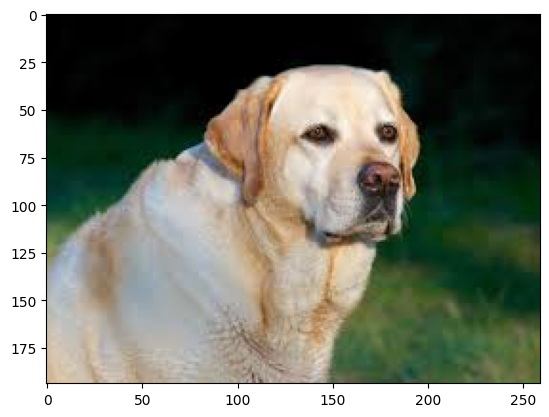

In [66]:
img = plt.imread(os.path.join(pa_cat,img_data[198]))
plt.imshow(img)

In [67]:
len(img_data)

303

In [68]:
# Using functional API instead of sequential api

def model_with_function():
    
    input_layer = tf.keras.Input(shape=(224,224,3))
    conv1 = Conv2D(64, (3,3), activation='relu')(input_layer)
    pool_1 = MaxPooling2D(2,2)(conv1)
    
    conv2 = Conv2D(128, (3,3), activation='relu')(pool_1)
    pool_2 = MaxPooling2D(2,2)(conv2)
    
    conv3 = Conv2D(128, (3,3), activation ='relu')(pool_2)
    pool_3 = MaxPooling2D(2,2)(conv3)
    
    flatten_layer= tf.keras.layers.Flatten()(pool_3)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer= tf.keras.layers.Dense(5, activation=tf.nn.softmax)(first_dense)
    
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

In [69]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [70]:
from tensorflow.keras.utils import plot_model


# Assuming you already have a model defined
model = model_with_function()

# Plotting the model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [71]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [72]:
model = model_with_function()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [76]:
training_datagen=ImageDataGenerator(
    rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

     
train_generator=training_datagen.flow_from_directory(
    training_dir,
    class_mode='categorical',
    target_size=(224,224))


validation_datagen=ImageDataGenerator(rescale=1./255)

valid_generator=validation_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',
    target_size=(224,224))

Found 303 images belonging to 1 classes.
Found 190 images belonging to 1 classes.


In [78]:
from tensorflow.keras.optimizers import Adam

# Assuming you already have a model defined
model = model_with_function()

# Compiling the model with the Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Specify the learning rate here
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [79]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,299,589 (43.10 MB)

 Trainable params: 11,299,589 (43.10 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
pip install scipy

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
    --------------------------------------- 0.8/46.2 MB 17.4 MB/s eta 0:00:03
   - -------------------------------------- 1.5/46.2 MB 16.2 MB/s eta 0:00:03
   -- ------------------------------------- 2.5/46.2 MB 17.4 MB/s eta 0:00:03
   --- ------------------------------------ 3.5/46.2 MB 18.6 MB/s eta 0:00:03
   --- ------------------------------------ 4.3/46.2 MB 18.4 MB/s eta 0:00:03
   ---- ----------------------------------- 4.9/46.2 MB 17.5 MB/s eta 0:00:03
   ---- ----------------------------------- 5.6/46.2 MB 16.9 MB/s eta 0:00:03
   ----- ---------------------------------- 6.2/46.2 MB 16.4 MB/s eta 0:00:03
   ----- ---------------------------------- 6.8/46.2 MB 16.0 MB/s eta 0:00:03
   ------ --------------------------------- 7.4/46.2 MB 15.7 MB/s eta 0:00:0

In [95]:
checkpoint_path = "../checkpoint_cat/weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,  # Explicitly specify filepath
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=60,
    validation_data=valid_generator,
    verbose=2,
    callbacks=[cp_callback]
)


ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=../checkpoint_cat/weights.h5

In [ ]:
model.save('cat_model.h5')